In this notebook, you will write code to build, compile and fit a convolutional neural network (CNN) model to the MNIST dataset of images of handwritten digits.

Some code cells are provided you in the notebook. You should avoid editing provided code, and make sure to execute the cells in order to avoid unexpected errors. Some cells begin with the line: 

In [1]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here




#### The MNIST dataset

In this assignment, you will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

In [2]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:


# Complete the following function. 
# Make sure to not change the function name or arguments.

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
    return train_images, test_images
    

In [4]:
# Run your function on the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [5]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have six layers.

In [8]:


def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    # Initialize a Sequential model
    model = tf.keras.Sequential()
    
    # Add a 2D convolutional layer
    model.add(tf.keras.layers.Conv2D(
        filters=8, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=input_shape))
    
    # Add a max pooling layer
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Add a flatten layer
    model.add(tf.keras.layers.Flatten())
    
    # Add the first dense hidden layer
    model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    
    # Add the second dense hidden layer
    model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    
    # Add the dense output layer
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    
    return model


In [9]:
# Run your function to get the model

model = get_model(scaled_train_images[0].shape)

In [10]:


def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(
        optimizer='adam',                           # Adam optimizer with default settings
        loss='sparse_categorical_crossentropy',     # Cross-entropy loss function
        metrics=['accuracy']                        # Accuracy as the performance metric
    )


In [11]:
# Run your function to compile the model

compile_model(model)

In [12]:


def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    # Train the model using the fit method
    history = model.fit(
        x=scaled_train_images,       # Scaled training images
        y=train_labels,              # Training labels
        epochs=5,                    # Number of epochs
        verbose=2                    # Display training progress
    )
    return history


In [13]:
# Run your function to train the model

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9319 - loss: 0.2257
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9750 - loss: 0.0821
Epoch 3/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9830 - loss: 0.0555
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9875 - loss: 0.0409
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9901 - loss: 0.0309


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [14]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

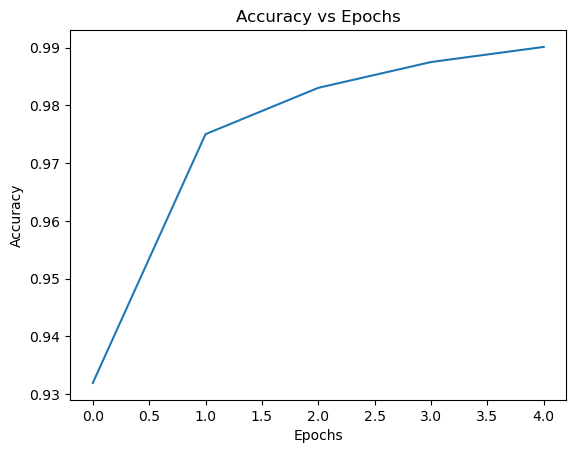

In [15]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

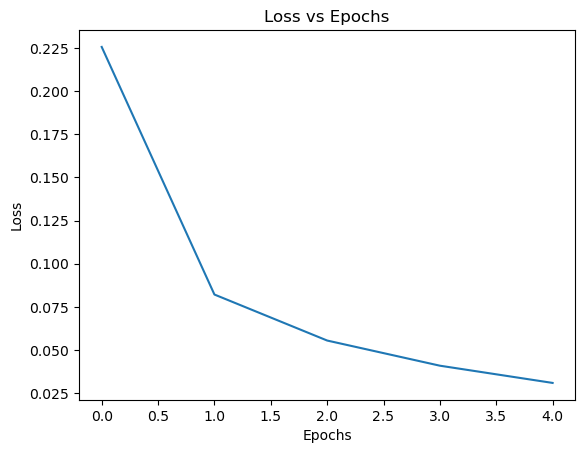

In [16]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [18]:


def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    # Evaluate the model on the test dataset
    test_loss, test_accuracy = model.evaluate(
        x=scaled_test_images,      # Scaled test images
        y=test_labels,             # Test labels
        verbose=2                  # Display evaluation progress
    )
    return test_loss, test_accuracy


In [19]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 0s - 1ms/step - accuracy: 0.9806 - loss: 0.0639
Test loss: 0.06387243419885635
Test accuracy: 0.9805999994277954


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


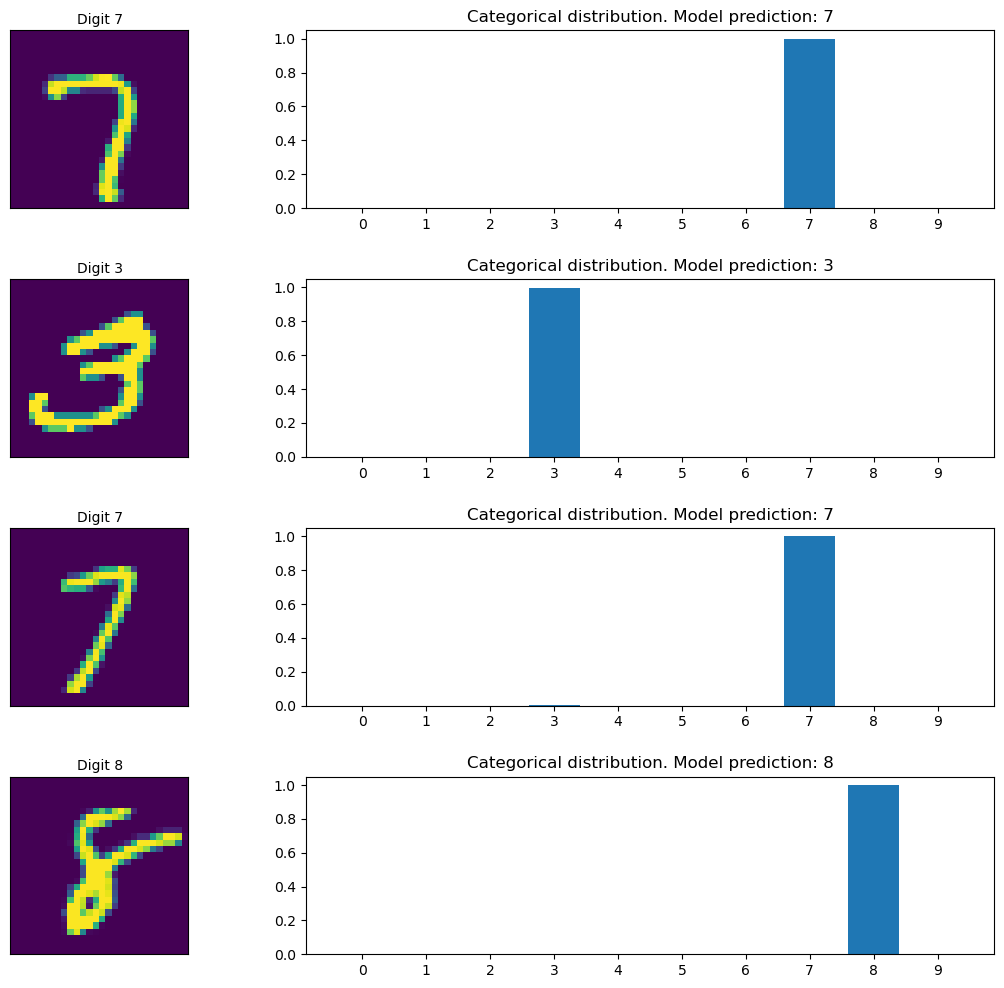

In [20]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()